### Packages

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import random

### Initialize Data

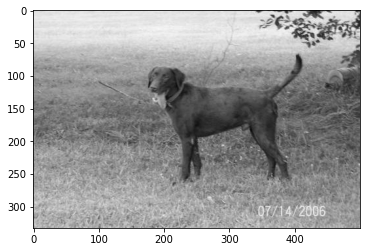

In [23]:
DATADIR = "/DriveArchive1/NN_DATASETS/PetImages"

CATEGORIES = ["Dog", "Cat"]

for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

In [24]:
print(img_array)

[[228 227 226 ...  51  55  67]
 [222 222 221 ...  78  83  79]
 [219 219 218 ... 115 123 107]
 ...
 [180 164 172 ... 145 162 177]
 [197 166 160 ... 143 158 172]
 [205 171 160 ... 146 161 174]]


In [25]:
print(img_array.shape)

(333, 500)


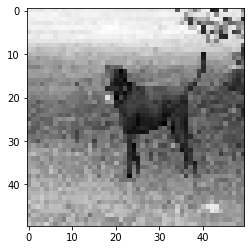

In [26]:
IMG_SIZE = 50

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

### Build Training Data

In [27]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))

100%|██████████| 12501/12501 [00:07<00:00, 1660.18it/s]

24946


**shuffle data**

In [28]:
random.shuffle(training_data)
for sample in training_data[:10]:
    print(sample[1])

0
0
0
0
1
1
1
0
1
0


### Make a Model

In [29]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

[[[[ 52]
   [124]
   [134]
   ...
   [ 93]
   [196]
   [ 91]]

  [[123]
   [ 79]
   [129]
   ...
   [179]
   [101]
   [100]]

  [[127]
   [130]
   [ 93]
   ...
   [ 84]
   [ 92]
   [ 91]]

  ...

  [[141]
   [140]
   [141]
   ...
   [123]
   [ 92]
   [157]]

  [[132]
   [ 95]
   [125]
   ...
   [121]
   [160]
   [ 99]]

  [[165]
   [143]
   [124]
   ...
   [161]
   [161]
   [158]]]]


**Export Data**

In [30]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

**Import Data**

In [31]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)